# Notebook Title

- Nama : Steven Kusuma
- Batch : 015
- Dashboard URL : https://public.tableau.com/shared/KCNPXZTMP?:display_count=n&:origin=viz_share_link

## Description

### Topik Permasalahan

Kurang tepatnya pemilihan waktu dan bulan untuk event

### Problem Statement

Meningkatkan sales profit by 10% di ecommerce electronic store dengan cara mengetahui preferensi brand dan category yang paling diminati dalam kurun waktu 1 tahun.

### Latar Belakang

Ecommerce yang bergerak di bidang electronic store menjual segala category yang berkaitan dengan electronic, dan bagaimana cara mengefisiensikan penjualan.

### Penjabaran Masalah

- Brand apa saja yang paling diminati?
- Category manakah dengan penjualan paling banyak?
- Apakah bulan mempengaruhi tingkat penjualan?
- Bagaimana waktu bisa mempengaruhi perilaku pembelian?
- Category apa dengan rata-rata harga paling tinggi?
- Berapa rata-rata penghasilan per hari?

## A. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## B. Data Loading

Dataset URL : https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store

In [2]:
df = pd.read_csv('kz.csv')
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18


In [3]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [4]:
df.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


## C. Data Cleaning

In [5]:
# Mengecek data type tiap column

df.dtypes

event_time        object
order_id           int64
product_id         int64
category_id      float64
category_code     object
brand             object
price            float64
user_id          float64
dtype: object

In [6]:
# Mengecek data missing values

df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [7]:
# Menampilkan semua data missing values di column "price"

bool_series = pd.isnull(df["price"])
df[bool_series]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
1812,2020-05-02 11:12:20 UTC,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN
3633,2020-05-06 07:37:55 UTC,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN
3918,2020-05-06 22:36:13 UTC,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN
6015,2020-05-10 09:41:54 UTC,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN
7802,2020-05-13 03:09:39 UTC,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN
...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56 UTC,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN
2632434,2020-11-19 05:38:31 UTC,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN
2632437,2020-11-19 11:21:22 UTC,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN
2632472,2020-11-19 09:54:22 UTC,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN


In [8]:
# Karena di price ada data null maka dihapus saja karena tidak tau berapa penjualannya

df.dropna(subset=['price'], inplace=True)

In [9]:
# Mengecek kembali missing values

df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id            0
category_code     612202
brand             112670
price                  0
user_id          1637398
dtype: int64

In [10]:
# Menampilkan semua data missing values di column "category_code"

bool_series = pd.isnull(df["category_code"])
df[bool_series]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
16,2020-04-28 02:21:45 UTC,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18
18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18
19,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18
25,2020-04-29 03:25:12 UTC,2297729407910937541,1515966223509105105,2.268105e+18,NaN,sbs,0.02,1.515916e+18
...,...,...,...,...,...,...,...,...
2633496,2020-11-21 09:50:24 UTC,2388440981134693925,1515966223513916332,2.268105e+18,NaN,ava,78.68,1.515916e+18
2633502,2020-11-21 09:59:01 UTC,2388440981134693930,1515966223510177554,2.268105e+18,NaN,dji,0.23,1.515916e+18
2633503,2020-11-21 09:59:01 UTC,2388440981134693930,2273948237628965713,2.268105e+18,NaN,dji,0.23,1.515916e+18
2633513,2020-11-21 10:08:14 UTC,2388440981134693940,2273948246856434093,2.268105e+18,NaN,xiaomi,16.18,1.515916e+18


In [11]:
# Menghapus data null di category_code

df.dropna(subset=['category_code'],inplace=True)

In [12]:
# Mengecek kembali missing values

df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id            0
category_code          0
brand              57190
price                  0
user_id          1154566
dtype: int64

In [13]:
# Menampilkan semua data missing values di column "brand"

bool_series = pd.isnull(df["brand"])
df[bool_series]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
61,2020-04-29 12:42:12 UTC,2298009757589438761,1515966223509104974,2.268105e+18,computers.peripherals.keyboard,NaN,12.71,1.515916e+18
69,2020-04-29 12:51:50 UTC,2298014603872830244,1515966223509089420,2.268105e+18,computers.peripherals.mouse,NaN,5.07,1.515916e+18
88,2020-04-29 13:29:25 UTC,2298033523732251384,2273948232075706577,2.268105e+18,computers.peripherals.mouse,NaN,20.35,1.515916e+18
92,2020-04-29 13:31:33 UTC,2298034599193740139,2273948254808834551,2.268105e+18,appliances.kitchen.blender,NaN,74.05,1.515916e+18
94,2020-04-29 13:31:33 UTC,2298034599193740139,1515966223509260303,2.268105e+18,furniture.kitchen.table,NaN,23.13,1.515916e+18
...,...,...,...,...,...,...,...,...
2633249,2020-11-21 03:49:01 UTC,2388440981134693709,2273948242175590517,2.268105e+18,computers.peripherals.mouse,NaN,2.06,1.515916e+18
2633301,2020-11-21 05:29:10 UTC,2388440981134693754,1515966223509382270,2.268105e+18,computers.components.cpu,NaN,46.27,1.515916e+18
2633315,2020-11-21 05:59:34 UTC,2388440981134693768,2337686271054316416,2.268105e+18,computers.peripherals.mouse,NaN,12.71,1.515916e+18
2633318,2020-11-21 06:03:17 UTC,2388440981134693771,2333247274437574677,2.268105e+18,furniture.kitchen.table,NaN,27.75,1.515916e+18


In [14]:
# Menghapus data null di brand

df.dropna(subset=['brand'],inplace=True)

In [15]:
# Mengecek kembali missing values

df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id            0
category_code          0
brand                  0
price                  0
user_id          1111457
dtype: int64

In [16]:
# Menampilkan semua data missing values di column "user_id"

bool_series = pd.isnull(df["user_id"])
df[bool_series]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
28815,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509089955,2.268105e+18,appliances.kitchen.meat_grinder,moulinex,57.85,NaN
28816,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509297118,2.268105e+18,appliances.environment.air_heater,ava,48.59,NaN
28817,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509088552,2.268105e+18,electronics.smartphone,samsung,196.27,NaN
28819,1970-01-01 00:33:40 UTC,2340102743319904671,1515966223509104166,2.268105e+18,electronics.smartphone,oppo,138.87,NaN
28821,1970-01-01 00:33:40 UTC,2340102743923884448,1515966223509106168,2.268105e+18,appliances.environment.vacuum,samsung,69.42,NaN
...,...,...,...,...,...,...,...,...
2438990,2020-09-28 03:13:32 UTC,2388440981134575642,2273948219366965392,2.268105e+18,appliances.kitchen.hood,jetair,41.64,NaN
2438992,2020-09-28 13:43:51 UTC,2388440981134575644,1515966223509104345,2.268105e+18,appliances.personal.scales,scarlett,12.71,NaN
2438996,2020-09-28 10:36:21 UTC,2388440981134575648,1515966223509105078,2.268105e+18,appliances.kitchen.refrigerators,indesit,416.64,NaN
2438998,2020-09-28 11:12:14 UTC,2388440981134575650,2273948314284065715,2.268105e+18,electronics.smartphone,sony,46.27,NaN


In [17]:
# Mengisi data null values di user_id dengan others anggapan saja bukan loyal user

df['user_id'].fillna('Others', inplace=True)

In [18]:
# Mengecek kembali missing values

df.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [19]:
# Split category_code menjadi part lebih specific

df['category'] = df['category_code'].str.rsplit('.', n=1, expand=True)[1]
df.drop(columns=['category_code'], inplace=True)

In [20]:
# Mengubah data type di event_time dari object menjadi datetime

df['event_time']=pd.to_datetime(df['event_time'])

In [21]:
# Split event_time menjadi masing-masing date dan time

df['date'] = [d.date() for d in df['event_time']]
df['time'] = [d.time() for d in df['event_time']]

In [22]:
df

,event_time,order_id,product_id,category_id,brand,price,user_id,category,date,time
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1515915625441993984.0,tablet,2020-04-24,11:50:39
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1515915625441993984.0,tablet,2020-04-24,11:50:39
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1515915625447879424.0,headphone,2020-04-24,14:37:43
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1515915625447879424.0,headphone,2020-04-24,14:37:43
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,maestro,39.33,1515915625450382848.0,table,2020-04-26,08:45:57
...,...,...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,2.374499e+18,lg,370.35,1515915625513809920.0,tv,2020-11-21,10:08:54
2633516,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2.268105e+18,oppo,138.87,1515915625514888704.0,smartphone,2020-11-21,10:10:01
2633517,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2.268105e+18,apple,418.96,1515915625514891264.0,smartphone,2020-11-21,10:10:13
2633518,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2.268105e+18,vitek,12.48,1515915625514834176.0,scales,2020-11-21,10:10:30


In [23]:
# Mengetahui rentang waktu data

report_date = np.unique(df.event_time)
report_date

array([Timestamp('1970-01-01 00:33:40+0000', tz='UTC'),
       Timestamp('2020-01-05 03:26:46+0000', tz='UTC'),
       Timestamp('2020-01-05 03:43:28+0000', tz='UTC'), ...,
       Timestamp('2020-11-21 10:10:01+0000', tz='UTC'),
       Timestamp('2020-11-21 10:10:13+0000', tz='UTC'),
       Timestamp('2020-11-21 10:10:30+0000', tz='UTC')], dtype=object)

In [24]:
# Karena tahun 1970 kurang relevant jadi dihapus saja

df1 = df[df["event_time"].dt.year != 1970] 

In [25]:
# Mengecek kembali rentang waktu data

report_date = np.unique(df1.date)
report_date

array([datetime.date(2020, 1, 5), datetime.date(2020, 1, 6),
       datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
       datetime.date(2020, 1, 9), datetime.date(2020, 1, 10),
       datetime.date(2020, 1, 11), datetime.date(2020, 1, 12),
       datetime.date(2020, 1, 13), datetime.date(2020, 1, 14),
       datetime.date(2020, 1, 15), datetime.date(2020, 1, 16),
       datetime.date(2020, 1, 17), datetime.date(2020, 1, 18),
       datetime.date(2020, 1, 19), datetime.date(2020, 1, 20),
       datetime.date(2020, 1, 21), datetime.date(2020, 1, 22),
       datetime.date(2020, 1, 23), datetime.date(2020, 1, 24),
       datetime.date(2020, 1, 25), datetime.date(2020, 1, 26),
       datetime.date(2020, 1, 27), datetime.date(2020, 1, 28),
       datetime.date(2020, 1, 29), datetime.date(2020, 1, 30),
       datetime.date(2020, 1, 31), datetime.date(2020, 2, 1),
       datetime.date(2020, 2, 2), datetime.date(2020, 2, 3),
       datetime.date(2020, 2, 4), datetime.date(2020, 2, 5),
  

Rentang waktu data mulai dari tanggal `5 Januari 2020 - 21 November 2020`

In [26]:
df1

,event_time,order_id,product_id,category_id,brand,price,user_id,category,date,time
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1515915625441993984.0,tablet,2020-04-24,11:50:39
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1515915625441993984.0,tablet,2020-04-24,11:50:39
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1515915625447879424.0,headphone,2020-04-24,14:37:43
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1515915625447879424.0,headphone,2020-04-24,14:37:43
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,maestro,39.33,1515915625450382848.0,table,2020-04-26,08:45:57
...,...,...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,2.374499e+18,lg,370.35,1515915625513809920.0,tv,2020-11-21,10:08:54
2633516,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2.268105e+18,oppo,138.87,1515915625514888704.0,smartphone,2020-11-21,10:10:01
2633517,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2.268105e+18,apple,418.96,1515915625514891264.0,smartphone,2020-11-21,10:10:13
2633518,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2.268105e+18,vitek,12.48,1515915625514834176.0,scales,2020-11-21,10:10:30


In [27]:
# Save cleaned data to csv

df1.to_csv('ecommerce_electronic_store.csv')

## D. Analisis dan Perhitungan

### i. Data Visualization

#### Visual 1. Brand paling Profitable dan Diminati

In [28]:
Most_profit_by_brands = df1.groupby('brand')['price'].sum().reset_index().sort_values('price').tail(10)

fig = px.bar(Most_profit_by_brands, x='price', y='brand', color='brand', color_discrete_sequence=px.colors.sequential.matter, title='Top 10 Most Profitable Brands', orientation='h').update_layout(
    xaxis_title="Total Income", yaxis_title="Brand")

fig.show()

Bar Graph diatas menunjukkan `10 brand` electronic paling untung dan diminati yaitu :

1. Samsung
2. Apple
3. LG
4. Asus
5. Huawei
6. Lenovo
7. Bosch
8. Beko
9. Oppo
10. Ava

#### Visual 2. Category paling Popular / Penjualan terbanyak

In [29]:
most_sold_categories = df1.groupby('category')['price'].agg('count').reset_index().sort_values('price', ascending=False).head(6)
most_sold_categories.rename(columns={'price': "times_sold"}, inplace=True)

fig = px.pie(most_sold_categories, values = 'times_sold', names='category', height=500, title='Top 6 Most Popular Categories',
color='category', color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

Pie Chart berikut menunjukkan `6 type` electronic category yang paling popular / penjualan terbanyak yaitu :

1. Smartphone
2. Refrigerators
3. TV
4. Notebook
5. Vacuum
6. Headphone

#### Visual 3. Bulan paling profitable

In [30]:
# Mengambil profit per bulan

best_month = df1.groupby(df1['event_time'].dt.strftime('%B'))['price'].agg('sum').reset_index()
best_month.rename(columns={'event_time': "month", 'price': "total_income"}, inplace=True)
best_month

,month,total_income
0,April,7008570.02
1,August,48237568.71
2,February,27030994.86
3,January,22647501.08
4,July,23855621.58
5,June,39550141.66
6,March,32673647.91
7,May,25416508.70
8,November,10753887.05
9,October,17632431.88


In [31]:
# Sort bulan sesuai dari urutan pertama

month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11}
best_month1 = best_month.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
best_month1

,month,total_income
3,January,22647501.08
2,February,27030994.86
6,March,32673647.91
0,April,7008570.02
7,May,25416508.70
5,June,39550141.66
4,July,23855621.58
1,August,48237568.71
10,September,43945557.00
9,October,17632431.88


In [32]:
best_month = best_month1.melt(id_vars='month', 
                 value_vars=['total_income'], 
                 var_name='Ratio', 
                 value_name='total_income')

fig = px.line(best_month1, x="month", y="total_income", 
              title='Total Income per Month')
fig.show()

/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_13162/141421083.py:1: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



Dari line graph diatas dapat dilihat bahwa :

1. Setiap `2 - 3 bulan` dari awal tahun penjualan mengalami peningkatan
2. Atau customer melakukan impulsive buying pada saat pertengahan tahun yang dimana mungkin kebutuhan sehari-hari mereka sudah tercapai jadi dana dialokasikan ke electronic
3. Bulan yang paling menguntukan yaitu : `March`. `June`, `August`

#### Visual 4. Jam paling profitable

In [33]:
# Mengambil 10 profit tertinggi pada jam

best_time = df1.groupby(df1['event_time'].dt.strftime('%r'))['price'].agg('sum').sort_values().tail(10).reset_index()
best_time

,event_time,price
0,10:49:15 AM,23154.94
1,09:09:41 AM,24117.89
2,11:00:00 AM,26753.33
3,04:00:00 AM,28403.78
4,08:12:38 AM,56417.69
5,06:00:03 PM,65724.09
6,06:00:01 PM,155653.64
7,12:00:00 PM,243118.52
8,03:00:01 AM,273740.96
9,04:30:01 PM,326995.31


In [34]:
fig = px.bar(best_time, x="event_time", y="price", orientation='v', title="Jam dengan total income terbanyak")

fig.show()

Ada 4 jam yang paling profitable diluar jam kerja :

1. Jam 16:30
2. Jam 03:00
3. Jam 12:00
4. Jam 18:00

Disinilah waktu-waktu user memegang hp dan melakukan transaksi

### ii. Statistic Descriptive using Central Tendency ( Mean, Median, dan Mode )

In [35]:
# Mean setiap category

data_price_mean = df1.groupby('category')['price'].mean().sort_values(ascending=False)
data_price_mean

category
video          620.713450
photo          506.290802
heater         503.302107
dishwasher     494.665568
notebook       440.682004
                  ...    
anti_freeze      7.733482
dolls            7.294538
watering         5.764000
paper            4.141482
battery          3.201858
Name: price, Length: 121, dtype: float64

In [36]:
# Median setiap category

data_price_median = df1.groupby('category')['price'].median().sort_values(ascending=False)
data_price_median

category
heater        590.25
video         509.24
dishwasher    486.09
photo         425.90
glove         403.45
               ...  
watering        5.30
paper           4.14
bed             2.99
cpu             2.52
battery         2.31
Name: price, Length: 121, dtype: float64

In [37]:
# Mode setiap price

data_price_mode = df1['price'].mode()
data_price_mode

0    138.87
Name: price, dtype: float64

Ada 4 category dalam rata-rata dan median tertinggi :

- Video
- Heater
- Photo
- Dishwasher

### iii. Statistic Inferential using One Sample Two Tailed

In [38]:
df1['date'] = df1['event_time'].dt.date
daily_income = df1[['date','price']].groupby('date').sum()
print('Average Income a Day : ${}'.format(np.round(daily_income['price'].mean())))

Average Income a Day : $927803.0


/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_13162/3835568883.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Our hypothesis on this case:

**H0: μ = \$927803**

**H1: μ != \$927803**

In [39]:
daily_income

,price
date,
2020-01-05,1011034.73
2020-01-06,865845.95
2020-01-07,1174369.15
2020-01-08,757592.66
2020-01-09,677721.12
...,...
2020-11-17,263746.33
2020-11-18,1029742.96
2020-11-19,1000672.38


In [40]:
t_stat,p_val = stats.ttest_1samp(daily_income.price, 927803)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.9999896416935092
t-statistics: -1.2992326642764132e-05


Sebelum melakukan hypothesis testing, kita terlebih dahulu mencari rata-rata income per hari dari data

Setelah itu bisa dibuat :
- Hypothesis 0 itu per hari sama dengan rata-rata
- Hypothesis 1 itu per hari tidak sama dengan rata-rata

Bisa dilihat dari p-value kalau itu lebih dari 0.05 yang berarti hypothesis 0 gagal ditolak. Berarti hypothesis 0 bisa diterima.

Yang kata lainnya itu adalah kemungkinan income per harinya sama dengan rata-rata atau di sekitaran confidence thresholdnya

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



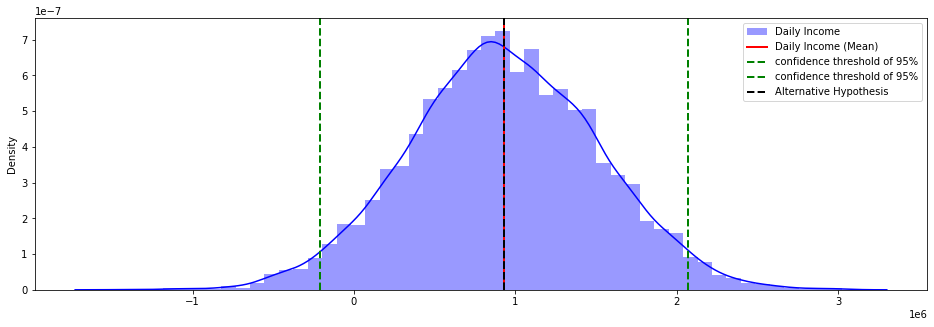

In [41]:
daily_income_pop = np.random.normal(daily_income.price.mean(), daily_income.price.std(), 10000)

ci = stats.norm.interval(0.95, daily_income.price.mean(), daily_income.price.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income', color='blue')
plt.axvline(daily_income.price.mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_income_pop.mean() - t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Bisa dilihat dari gambar diatas garis putus-putus hitam ada di dalam confidence threshold, maka gagal tolak h0.

## E. Conclusions, Assumptions, Overall Analysis

Untuk menaikkan sales profit by 10% dalam kurun waktu 1 tahun lebih baik difokuskan ke criteria sebagai berikut :

1. Brand : Samsung, Apple, LG ( Brand ternama )
2. Category : Smartphone, Refrigerators, TV ( Barang-barang necesities )
3. Event-time : March, June, August dan jam diluar working hours
4. Harus lebih dari $1 million per harinya